In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

pd.options.display.float_format = "{:,.2f}".format

In [59]:
data_dir = '../data'
merged_df = pd.read_csv(os.path.join(data_dir, 'all_merged.csv'))
merged_df = merged_df.drop(['Unnamed: 0'], axis=1)
merged_df

,lon_bounds,lat_bounds,year,burned_area,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,...,tas_8,tasmax_8,pr_8,dry_days,lccs_class,processed_flag,current_pixel_state,observation_count,change_count,country
0,-10.00,51.50,2001,0.00,0.04,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.27,NaN,NaN,NaN,NaN,NaN,Éire / Ireland
1,-10.00,51.50,2002,0.00,0.04,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.44,NaN,NaN,NaN,NaN,NaN,Éire / Ireland
2,-10.00,51.50,2003,0.00,0.04,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.04,NaN,NaN,NaN,NaN,NaN,Éire / Ireland
3,-10.00,51.50,2004,0.00,0.04,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.01,NaN,NaN,NaN,NaN,NaN,Éire / Ireland
4,-10.00,51.50,2005,0.00,0.04,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,21.86,NaN,NaN,NaN,NaN,NaN,Éire / Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262834,50.00,51.75,2015,0.00,0.99,1.00,17.60,23.30,34.40,24.50,...,20.50,26.90,17.40,32.76,NaN,NaN,NaN,NaN,NaN,Россия
262835,50.00,51.75,2016,"482,982.00",0.99,1.00,17.30,23.40,45.90,20.40,...,25.20,32.40,17.00,31.73,NaN,NaN,NaN,NaN,NaN,Россия
262836,50.00,51.75,2017,"8,747,340.00",0.99,1.00,15.10,20.90,37.20,18.70,...,23.70,30.00,6.70,NaN,NaN,NaN,NaN,NaN,NaN,Россия
262837,50.00,51.75,2018,"9,122,992.00",0.99,1.00,18.00,24.80,21.60,20.00,...,21.50,28.50,8.30,NaN,NaN,NaN,NaN,NaN,NaN,Россия


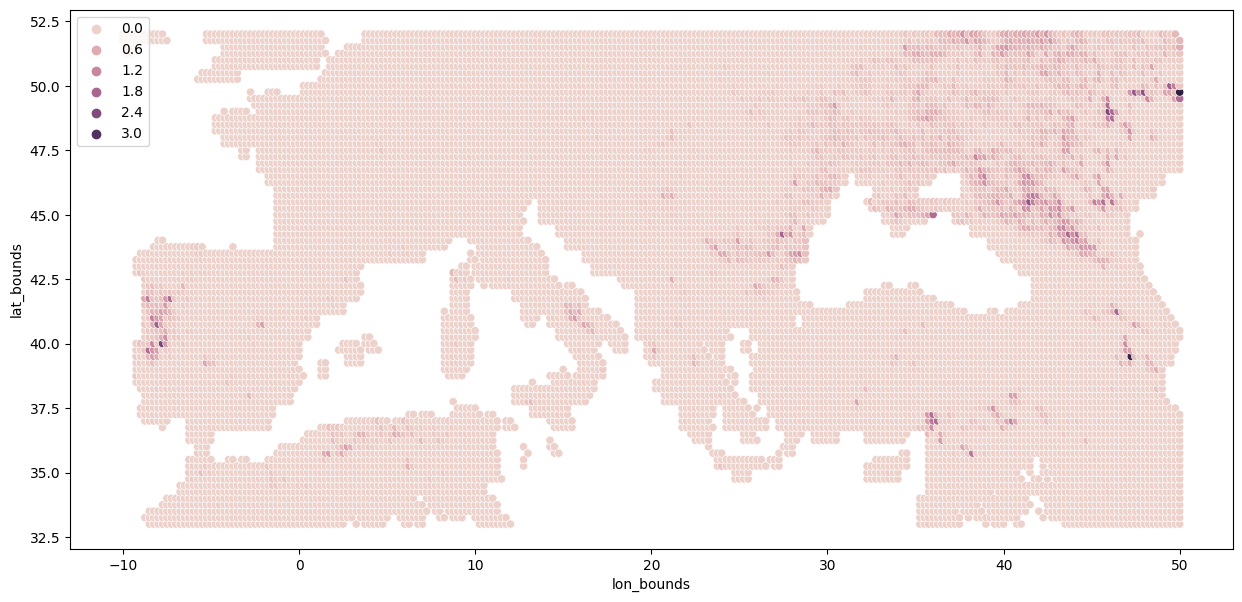

In [56]:
year = 2005
merged_df_plotting = merged_df[merged_df['year'] == year]

plt.figure(figsize=(15,7))
sns.scatterplot(data=merged_df_plotting, x='lon_bounds', y='lat_bounds', hue = 'burned_area')
plt.legend(loc='upper left');

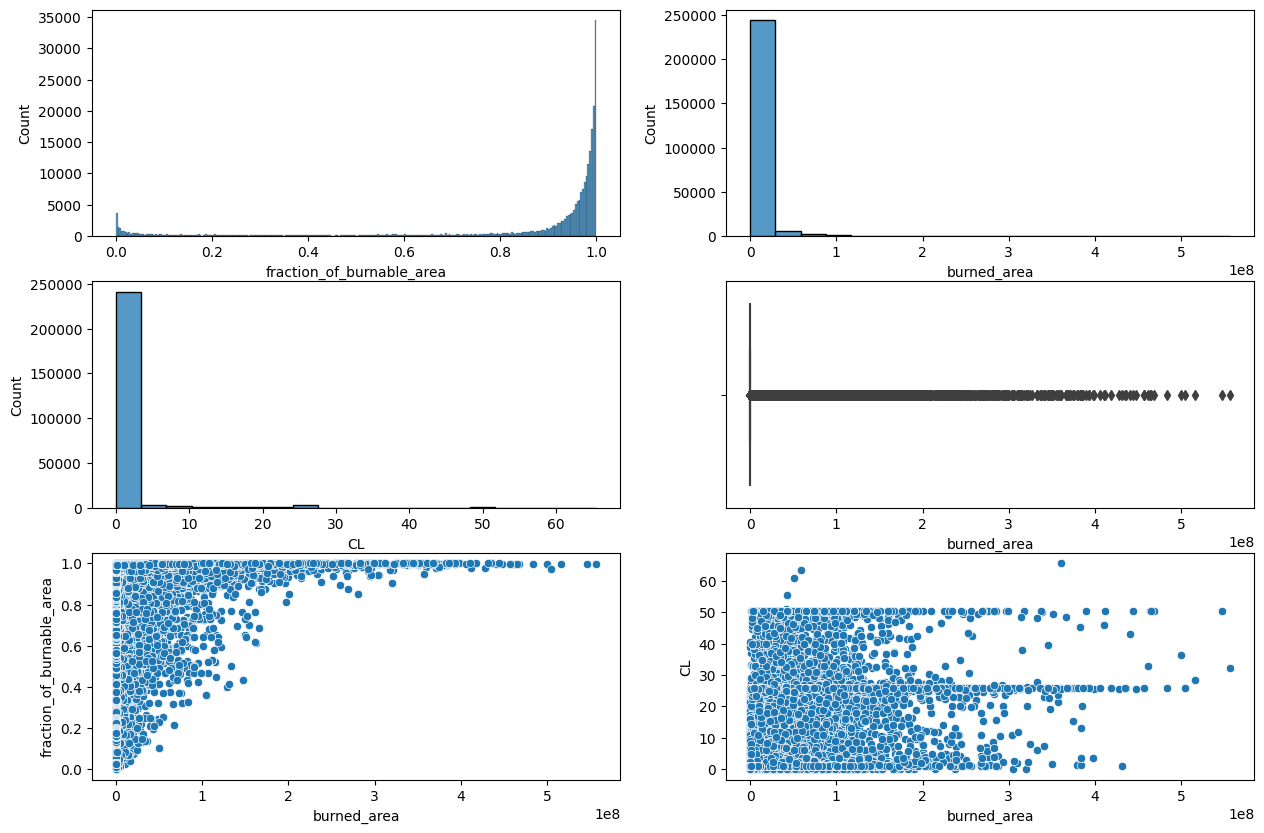

In [57]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(merged_df['fraction_of_burnable_area'], ax=ax1)
sns.histplot(merged_df['burned_area'], ax=ax2)
sns.histplot(merged_df['CL'], ax=ax3)
sns.boxplot(data = merged_df, x= 'burned_area', ax=ax4)
sns.scatterplot(data=merged_df, x='burned_area', y='fraction_of_burnable_area', ax=ax5)
sns.scatterplot(data=merged_df, x='burned_area', y='CL', ax=ax6)

plt.show();


 # filtering dataset

1. seems there is one outlier in burned area 
2. the distribution for 'fraction_of_burnable_area' is skewd and data wit less than 80% could be removed

In [62]:

merged_df_filtered = merged_df[merged_df['fraction_of_burnable_area'] >= 0.9]
#mask = (merged_df_filtered['CL'] > 50) # keeps only pixels where confidance that burning is real is abou 50%
#merged_df_filtered = merged_df_filtered[mask].reset_index(drop=True)
#merged_df_filtered = merged_df_filtered[merged_df_filtered['CL'] > 0]
merged_df_filtered = merged_df_filtered.reset_index(drop=True)
merged_df_filtered['pr'] = merged_df_filtered['pr_7'] + merged_df_filtered['pr_8']
merged_df_filtered['tas'] = (merged_df_filtered['tas_7'] + merged_df_filtered['tas_8']) / 2
merged_df_filtered['tasmax'] = merged_df_filtered[['tasmax_7','tasmax_8']].max(axis=1)

merged_df_filtered.drop(['tas_5','tasmax_5','pr_5','tas_6','tasmax_6','pr_6','tas_7','tasmax_7','pr_7','tas_8','tasmax_8','pr_8'], axis=1)

merged_df_filtered

,lon_bounds,lat_bounds,year,burned_area,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,...,dry_days,lccs_class,processed_flag,current_pixel_state,observation_count,change_count,country,pr,tas,tasmax
0,-9.75,52.00,2001,0.00,0.94,0.00,11.40,15.30,47.50,12.50,...,18.73,NaN,NaN,NaN,NaN,NaN,Éire / Ireland,238.00,14.35,17.70
1,-9.75,52.00,2002,0.00,0.94,0.00,10.50,13.70,181.70,12.10,...,17.66,NaN,NaN,NaN,NaN,NaN,Éire / Ireland,168.30,13.95,17.60
2,-9.75,52.00,2003,0.00,0.94,0.00,10.30,13.40,140.30,13.40,...,13.73,NaN,NaN,NaN,NaN,NaN,Éire / Ireland,134.70,15.35,19.40
3,-9.75,52.00,2004,0.00,0.94,0.00,10.70,14.20,54.60,13.50,...,20.69,NaN,NaN,NaN,NaN,NaN,Éire / Ireland,231.90,14.40,18.30
4,-9.75,52.00,2005,0.00,0.94,0.00,10.00,13.20,127.30,13.70,...,21.68,NaN,NaN,NaN,NaN,NaN,Éire / Ireland,170.20,14.75,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184260,50.00,51.75,2015,0.00,0.99,1.00,17.60,23.30,34.40,24.50,...,32.76,NaN,NaN,NaN,NaN,NaN,Россия,56.60,21.35,28.00
184261,50.00,51.75,2016,"482,982.00",0.99,1.00,17.30,23.40,45.90,20.40,...,31.73,NaN,NaN,NaN,NaN,NaN,Россия,55.40,24.30,32.40
184262,50.00,51.75,2017,"8,747,340.00",0.99,1.00,15.10,20.90,37.20,18.70,...,NaN,NaN,NaN,NaN,NaN,NaN,Россия,30.40,23.55,30.00
184263,50.00,51.75,2018,"9,122,992.00",0.99,1.00,18.00,24.80,21.60,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,Россия,61.70,23.45,31.30


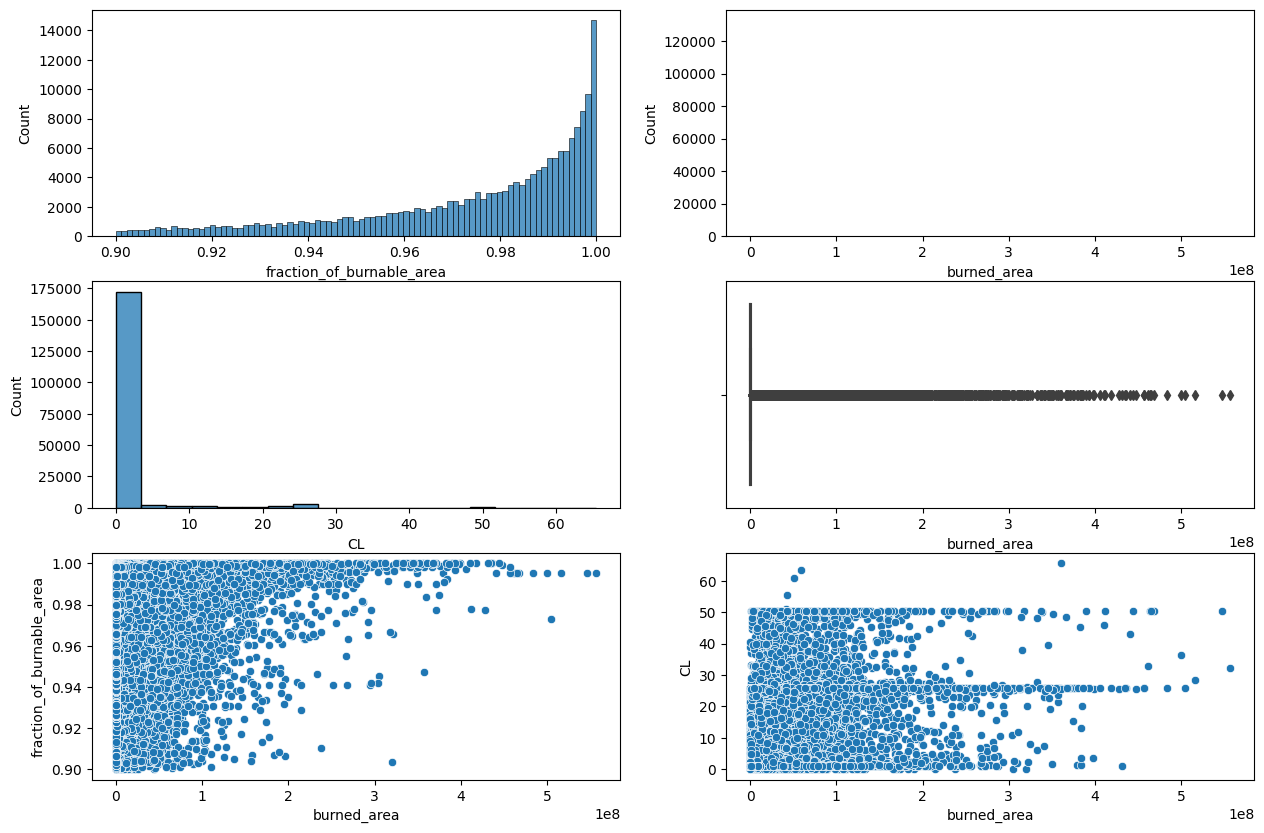

In [29]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(merged_df_filtered['fraction_of_burnable_area'], ax=ax1)
sns.histplot(merged_df_filtered['burned_area'], ax=ax2)
sns.histplot(merged_df_filtered['CL'], ax=ax3)
sns.boxplot(data = merged_df_filtered, x= 'burned_area', ax=ax4)
sns.scatterplot(data=merged_df_filtered, x='burned_area', y='fraction_of_burnable_area', ax=ax5)
sns.scatterplot(data=merged_df_filtered, x='burned_area', y='CL', ax=ax6)

plt.show();

I would not remove more of the burned area 'outliers' since the outliers are what we are actually looking for

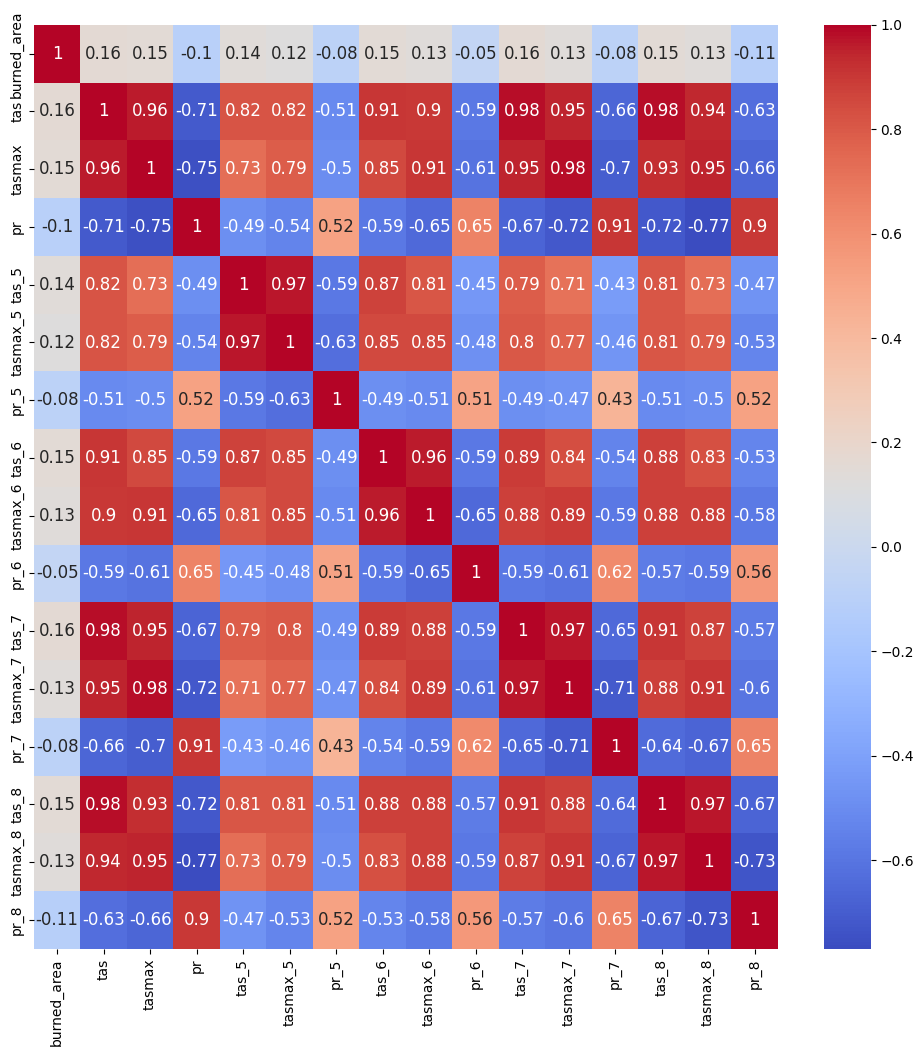

In [49]:
plt.figure(figsize = (12,12))
frame = merged_df_filtered[['burned_area', 'tas', 'tasmax', 'pr', 'tas_5', 'tasmax_5', 'pr_5', 'tas_6', 'tasmax_6', 'pr_6', 'tas_7', 'tasmax_7', 'pr_7', 'tas_8', 'tasmax_8', 'pr_8']]
sns.heatmap(round(frame.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

# Splitting the data

In [61]:
y = merged_df_filtered['burned_area']
X = merged_df_filtered.drop('burned_area', axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (128893, 25)
y_train:  (128893,)
X_test:  (55241, 25)
y_test:  (55241,)


# Normalisation

## longitude and latitude

We don't want to use lon and lat as input varibales. So we don't need to normalize them.

## year

In [34]:
ohe = OneHotEncoder(sparse = False) 

ohe.fit(X_train[['year']])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[['year']])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['year']])

X_train

/Users/arnaudgoussebaile/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
1371,-8.00,39.25,2015,0.98,1.00,19.30,25.80,7.50,22.80,29.60,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
33633,3.25,39.50,2007,0.97,1.00,19.20,24.40,11.20,23.30,28.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
86763,22.50,47.00,2003,0.97,1.00,18.70,25.10,46.90,20.90,27.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
67046,16.50,49.25,2018,0.97,1.00,16.30,22.00,47.00,17.70,23.10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
59184,13.75,42.25,2007,0.94,1.00,14.20,18.30,85.00,18.20,22.70,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,32.75,49.75,2009,0.99,1.00,15.80,21.50,39.50,21.00,26.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
103694,27.50,43.00,2008,0.96,1.00,16.20,21.50,34.50,21.50,27.10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
131932,36.50,47.50,2007,0.97,1.25,18.30,25.10,22.80,21.90,28.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
146867,41.00,49.50,2004,1.00,1.00,15.20,20.10,54.80,18.90,24.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## fire data

### fraction_of_burnable_area
this is already in a range of 0 - 1

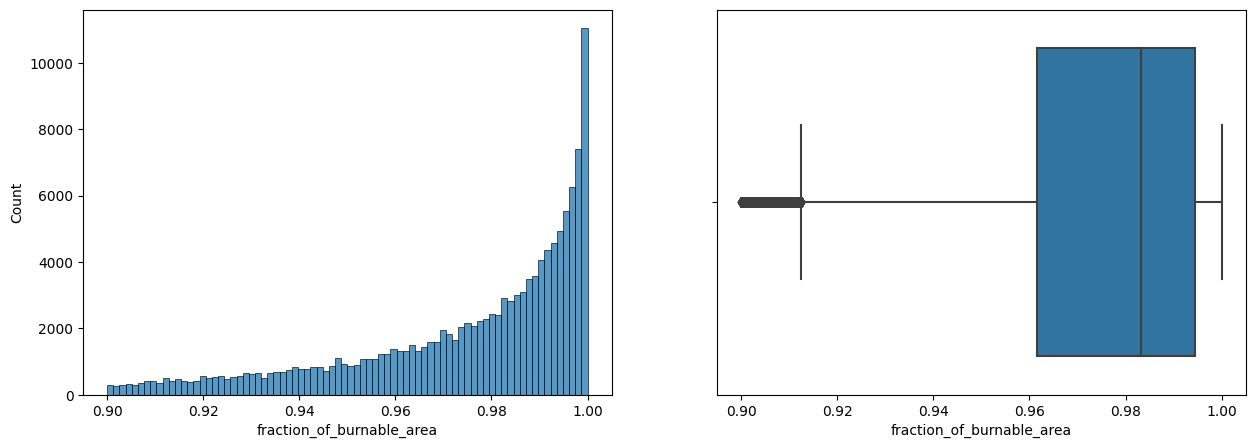

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

the distribution is not normal and there are outliers. I will perform Robust Scaer as well but not sure whether this is neccessary

In [36]:
rb_scaler = RobustScaler()

rb_scaler.fit(X_train[['fraction_of_burnable_area']])
X_train[['fraction_of_burnable_area']] = rb_scaler.transform(X_train[['fraction_of_burnable_area']])
X_test[['fraction_of_burnable_area']] = rb_scaler.transform(X_test[['fraction_of_burnable_area']])

X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
1371,-8.00,39.25,2015,-0.16,1.00,19.30,25.80,7.50,22.80,29.60,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
33633,3.25,39.50,2007,-0.27,1.00,19.20,24.40,11.20,23.30,28.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
86763,22.50,47.00,2003,-0.30,1.00,18.70,25.10,46.90,20.90,27.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
67046,16.50,49.25,2018,-0.28,1.00,16.30,22.00,47.00,17.70,23.10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
59184,13.75,42.25,2007,-1.37,1.00,14.20,18.30,85.00,18.20,22.70,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


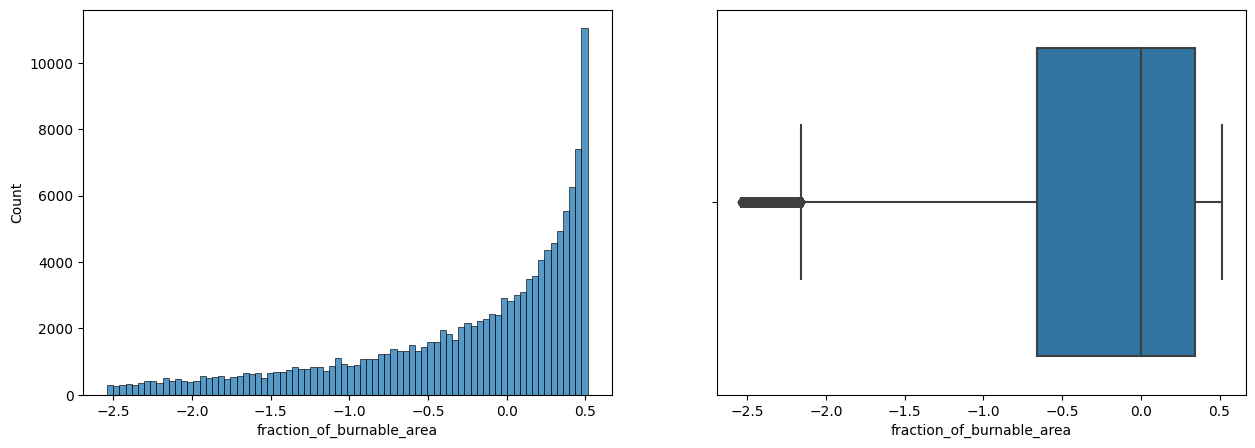

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

### confidance of pixel actually burning

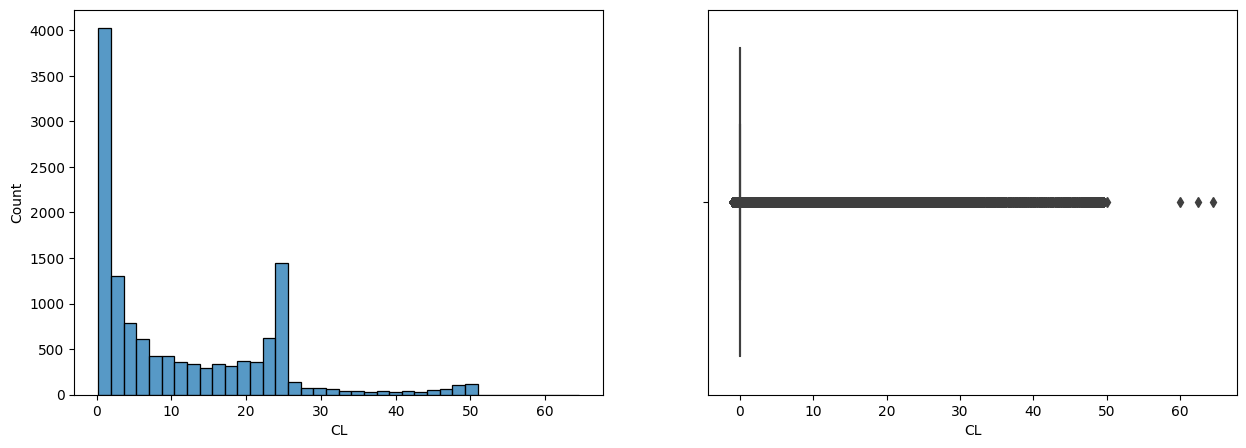

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

df_CL = X_train[X_train['CL']>0]
sns.histplot(df_CL['CL'], ax= ax1)
sns.boxplot(data = X_train, x= 'CL', ax=ax2);

no outliers but also not a normal distribution so I am using MinMaxScaler

In [39]:
mm_scaler = MinMaxScaler()

rb_scaler.fit(X_train[['CL']])
X_train[['CL']] = rb_scaler.transform(X_train[['CL']])
X_test[['CL']] = rb_scaler.transform(X_test[['CL']])
X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
1371,-8.00,39.25,2015,-0.16,0.00,19.30,25.80,7.50,22.80,29.60,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
33633,3.25,39.50,2007,-0.27,0.00,19.20,24.40,11.20,23.30,28.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
86763,22.50,47.00,2003,-0.30,0.00,18.70,25.10,46.90,20.90,27.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
67046,16.50,49.25,2018,-0.28,0.00,16.30,22.00,47.00,17.70,23.10,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
59184,13.75,42.25,2007,-1.37,0.00,14.20,18.30,85.00,18.20,22.70,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


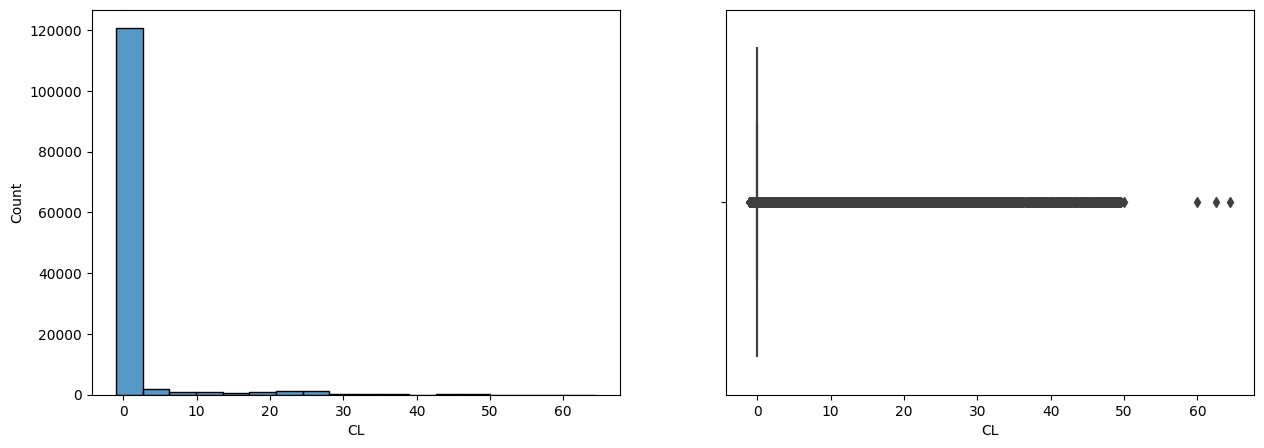

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['CL'], ax= ax1)
sns.boxplot(data = X_train, x= 'CL', ax=ax2);

## climate data

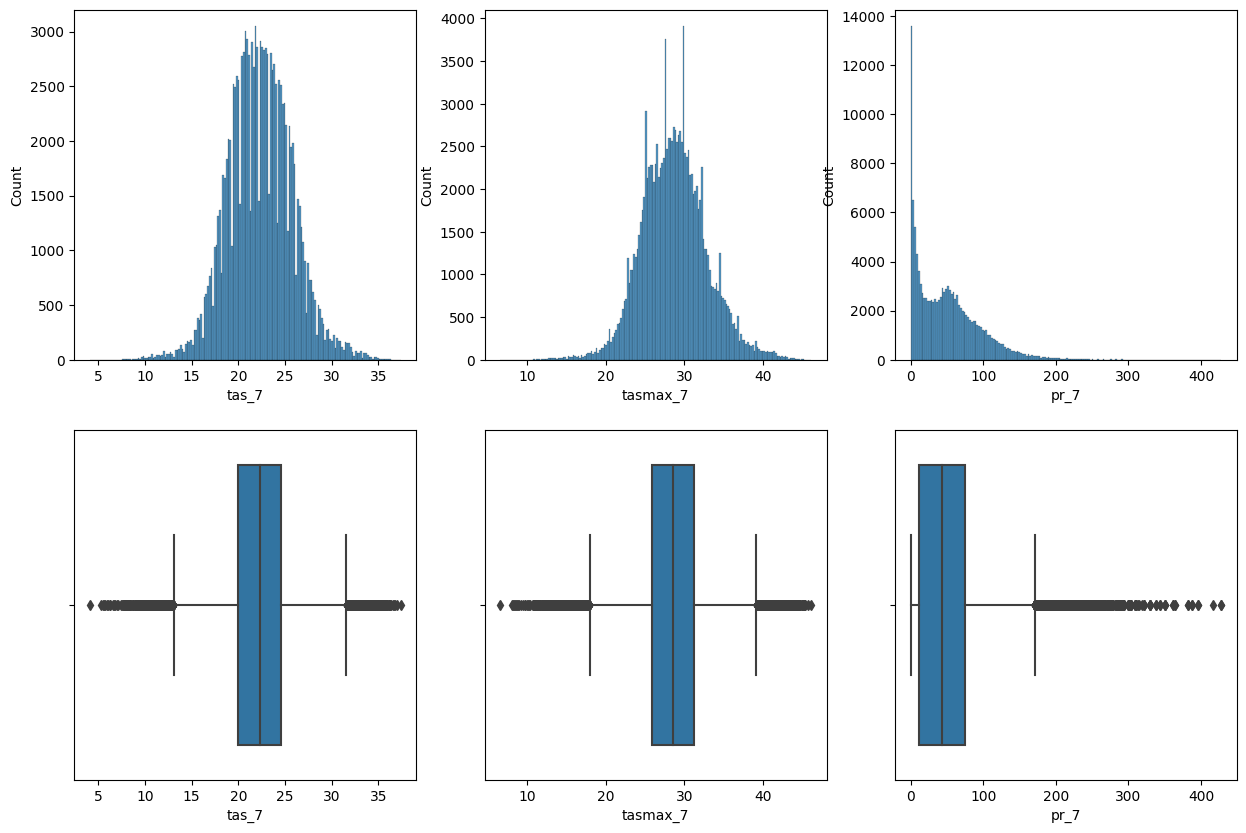

In [41]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(X_train['tas_7'], ax= ax1)
sns.histplot(X_train['tasmax_7'], ax= ax2)
sns.histplot(X_train['pr_7'], ax= ax3)

sns.boxplot(data = X_train, x= 'tas_7', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax_7', ax=ax5)
sns.boxplot(data = X_train, x= 'pr_7', ax=ax6);

tas and maxtas seem to have normal distribution but there are some outliers so I am using RobustScaler on all three

In [50]:
rb_scaler = RobustScaler()

for i in range(5,9):
    tas = f'tas_{i}'
    tasmax = f'tasmax_{i}'
    pr = f'pr_{i}'
    rb_scaler.fit(X_train[[tas, tasmax, pr]])
    X_train[[tas, tasmax, pr]] = rb_scaler.transform(X_train[[tas, tasmax, pr]])
    X_test[[tas, tasmax, pr]] = rb_scaler.transform(X_test[[tas, tasmax, pr]])


rb_scaler.fit(X_train[['tas', 'tasmax', 'pr']])
X_train[['tas', 'tasmax', 'pr']] = rb_scaler.transform(X_train[['tas', 'tasmax', 'pr']])
X_test[['tas', 'tasmax', 'pr']] = rb_scaler.transform(X_test[['tas', 'tasmax', 'pr']])

X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
1371,-8.00,39.25,2015,-0.16,0.00,0.92,0.98,-1.02,0.70,0.74,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
33633,3.25,39.50,2007,-0.27,0.00,0.89,0.65,-0.94,0.81,0.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
86763,22.50,47.00,2003,-0.30,0.00,0.76,0.81,-0.18,0.26,0.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
67046,16.50,49.25,2018,-0.28,0.00,0.13,0.09,-0.17,-0.49,-0.56,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
59184,13.75,42.25,2007,-1.37,0.00,-0.42,-0.77,0.64,-0.37,-0.64,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


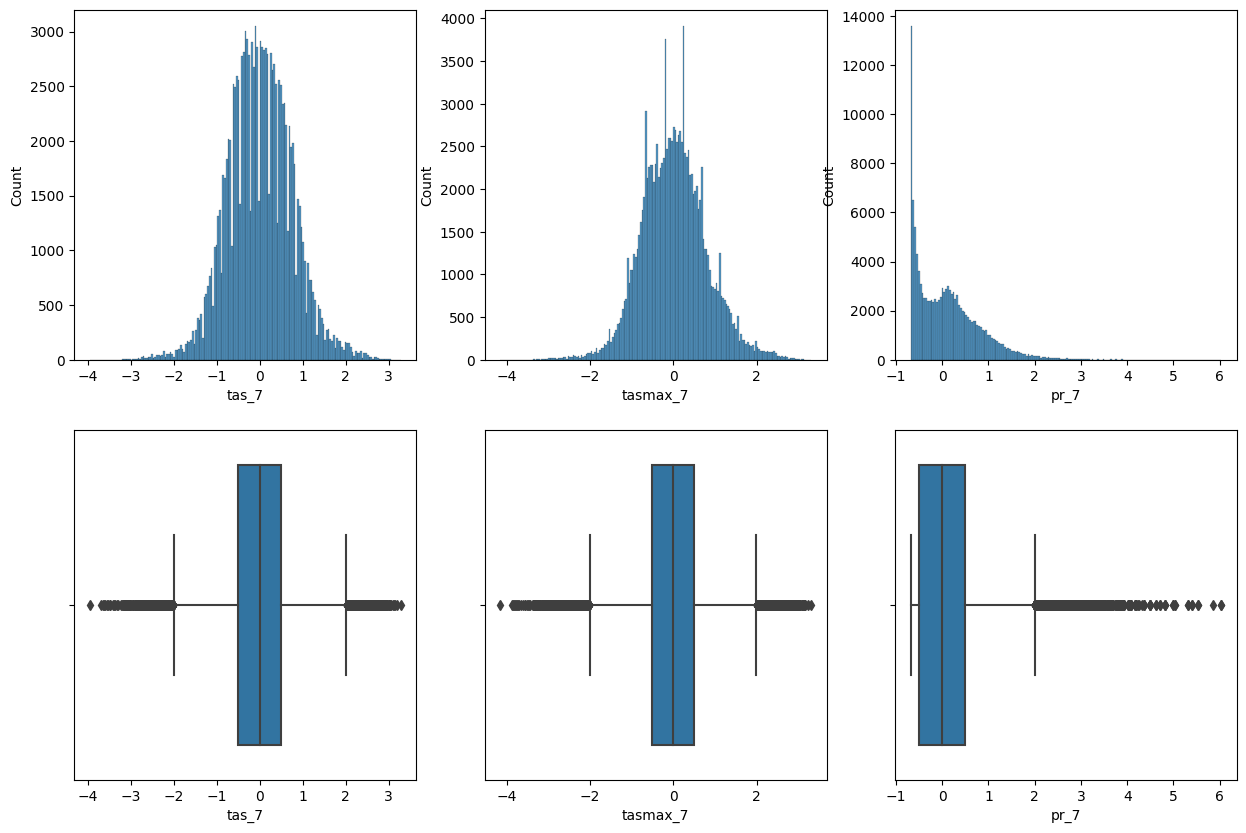

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(X_train['tas_7'], ax= ax1)
sns.histplot(X_train['tasmax_7'], ax= ax2)
sns.histplot(X_train['pr_7'], ax= ax3)

sns.boxplot(data = X_train, x= 'tas_7', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax_7', ax=ax5)
sns.boxplot(data = X_train, x= 'pr_7', ax=ax6);

## landcover data

lccs_is are classes so I use OneHot Encoder

In [ ]:
ohe = OneHotEncoder(sparse = False) 

ohe.fit(X_train[['lccs_class']])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[['lccs_class']])
X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['lccs_class']])

X_train.head()

/Users/arnaudgoussebaile/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,lccs_class_122,lccs_class_130,lccs_class_150,lccs_class_153,lccs_class_160,lccs_class_180,lccs_class_190,lccs_class_200,lccs_class_201,lccs_class_210
1371,-8.00,39.25,2015,-0.158634,0.0,0.921053,0.976744,-1.021459,0.697674,0.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33633,3.25,39.50,2007,-0.273764,0.0,0.894737,0.651163,-0.942060,0.813953,0.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86763,22.50,47.00,2003,-0.303021,0.0,0.763158,0.813953,-0.175966,0.255814,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67046,16.50,49.25,2018,-0.281244,0.0,0.131579,0.093023,-0.173820,-0.488372,-0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59184,13.75,42.25,2007,-1.373241,0.0,-0.421053,-0.767441,0.641631,-0.372093,-0.64,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Saving normailzed data

In [44]:
X_train.head()

,lon_bounds,lat_bounds,year,fraction_of_burnable_area,CL,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
1371,-8.00,39.25,2015,-0.16,0.00,0.92,0.98,-1.02,0.70,0.74,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
33633,3.25,39.50,2007,-0.27,0.00,0.89,0.65,-0.94,0.81,0.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
86763,22.50,47.00,2003,-0.30,0.00,0.76,0.81,-0.18,0.26,0.30,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
67046,16.50,49.25,2018,-0.28,0.00,0.13,0.09,-0.17,-0.49,-0.56,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
59184,13.75,42.25,2007,-1.37,0.00,-0.42,-0.77,0.64,-0.37,-0.64,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [45]:
y_train.head()

1371            0.00
33633           0.00
86763           0.00
67046           0.00
59184   8,801,005.00
Name: burned_area, dtype: float64

In [51]:
X_train.to_csv('../data/X_train.csv')
y_train.to_csv('../data/y_train.csv')
X_test.to_csv('../data/X_test.csv')
y_test.to_csv('../data/y_test.csv')